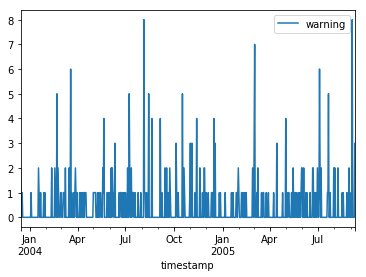

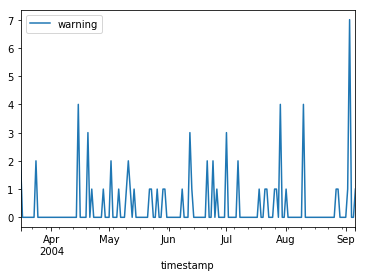

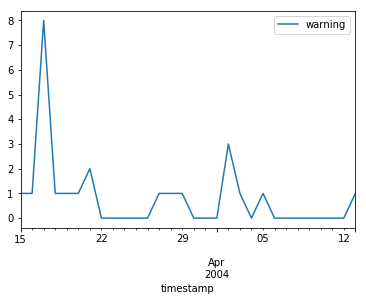

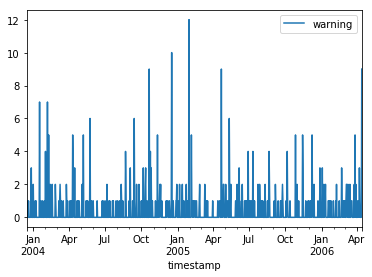

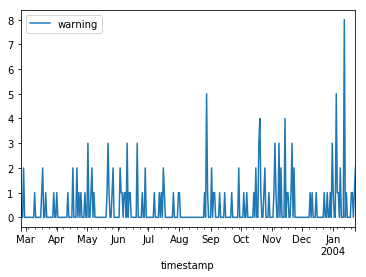

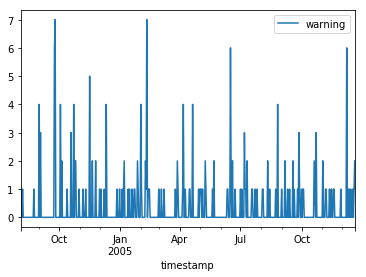

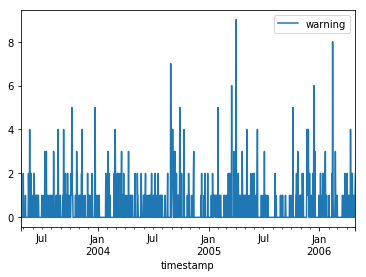

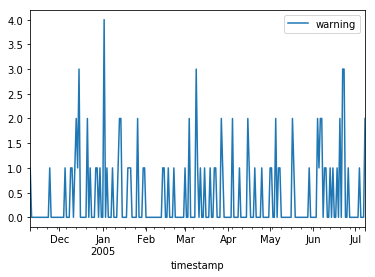

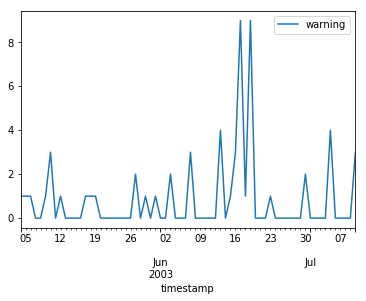

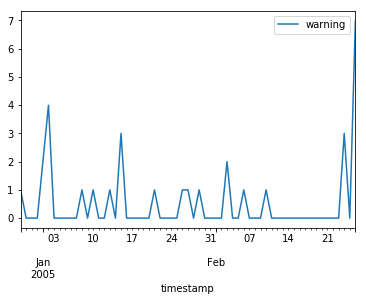

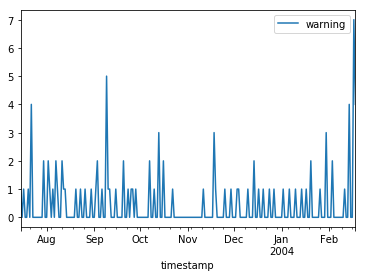

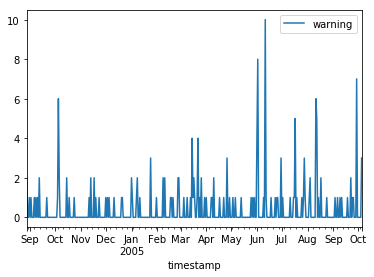

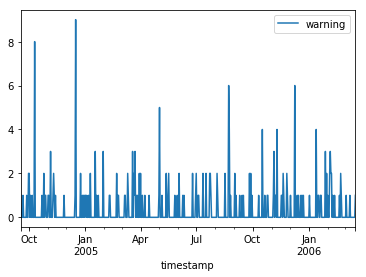

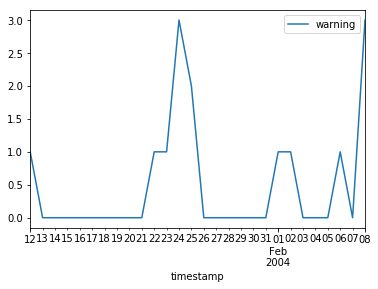

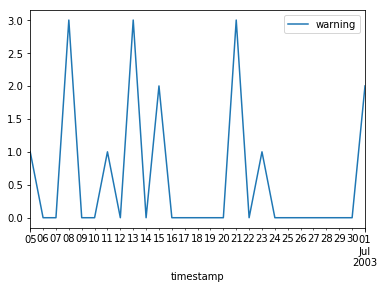

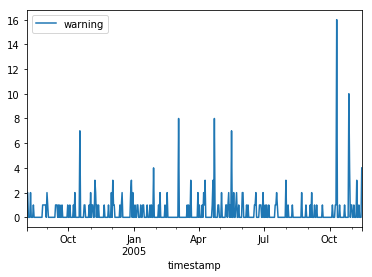

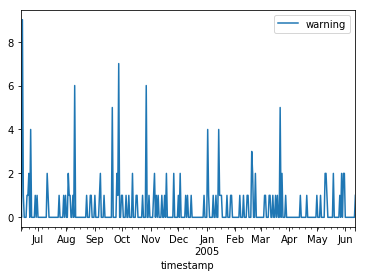

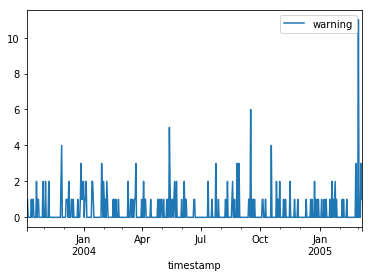

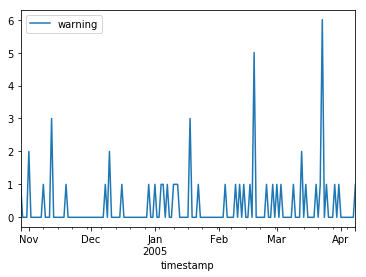

In [58]:
from IPython.display import display
import pandas as pd
import re
import glob

import matplotlib.pyplot as plt
%matplotlib inline 

def load_rms(filename):
    return pd.read_csv(filename, index_col="timestamp")
def load_alarms(filename):
#     return pd.read_csv(filename, header=None, names=["timestamp", "message"], index_col="timestamp").describe()
    return pd.read_csv(filename, header=None, names=["timestamp", "message"])
# rms = load_rms('data/train/unit0000_rms.csv')
# alarms = load_alarms('data/train/unit0000_alarms.csv')
# rms.loc["2005-08-01":"2005-09-01"].plot(ylim=(-10, 1500))
# rms.loc["2005-08-01":"2005-08-02"].plot(ylim=(-10, 1500))


rms = load_rms('data/train/unit0000_rms.csv')

# alarms = load_alarms('data/train/unit0000_alarms.csv')

numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

ID = 0
for alarms_file in sorted(glob.glob('data/train/*_alarms.csv'), key=numericalSort):
    # Since machine 13 has no alarms at all so we skip it
    if ID == 13:
        ID += 1
        continue
    alarms = load_alarms(alarms_file)
    alarms['warning'] = 1
#     print(alarms.columns.values)
#     print(alarms.head())
#     print(alarms.dtypes)
    alarms['timestamp'] = pd.to_datetime(alarms['timestamp'])
    alarms['timestamp'] = alarms['timestamp'].dt.floor('d') # round up the timestamp to day
    alarms = alarms.groupby(['timestamp']).sum().reset_index() # sum all the alarms in each day
#     alarms.plot(x = 'timestamp', y = 'warning')

    alarms.set_index(alarms.timestamp, inplace=True)
    alarms = alarms.resample('D').sum().fillna(0) # fill in the missing days with warning as 0
#     print(alarms.head())
    alarms.plot( y = 'warning')
    ID += 1

In [ ]:
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
filt_df = rms.loc[:, rms.columns != 'Index']
low = .01
high = .99
quant_df = filt_df.quantile([low, high])

filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & (x < quant_df.loc[high,x.name])], axis=0)
rms=filt_df

rms.loc["2003-12-15":"2004-01-14"].plot(ylim=(-10, 1500)).legend(bbox_to_anchor=(1.0, 0.5))
rms.loc["2003-12-18":"2003-12-20"].plot(ylim=(-10, 1500)).legend(bbox_to_anchor=(1.0, 0.5))

display(rms.describe())